<a href="https://colab.research.google.com/github/TasneemAhmed/Hotel-Booking-Data-Analysis/blob/main/Hotel_Booking_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import packages**



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import plotly.graph_objs as go
#to visual in offline mode
from plotly.offline import  iplot
import plotly.express as xp

# **2. Load Data**

In [8]:
#shows how to mount your Google Drive in your virtual machine using an authorization code.
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [9]:
hotel_df = pd.read_csv('/gdrive/MyDrive/Hotel Booking Data Analysis/hotel_bookings.csv')
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017


# **3. Preprocessing Data**

**3.1 Replace missing values with 0**

In [10]:
hotel_df.isnull().values.any()

True

In [11]:
#show sum of missing values in each column
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
#replace any missing values wit 0
hotel_df.fillna(0, inplace = True)

**3.2 filter data with only have childern and babies and adults**

In [13]:
hotel_df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [14]:
hotel_df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [15]:
hotel_df['babies'].unique()

array([ 0,  1,  2, 10,  9])

In [16]:
final_data = hotel_df.query('adults != 0 & children != 0 & babies != 0')
final_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
272,Resort Hotel,0,87,2015,July,28,10,2,5,2,1.0,1,FB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,0,No Deposit,5.0,0.0,0,Transient,133.83,0,2,Check-Out,7/17/2015
521,Resort Hotel,0,106,2015,July,29,18,2,3,2,1.0,1,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,126.00,0,2,Check-Out,7/23/2015
951,Resort Hotel,0,116,2015,August,32,7,2,5,2,1.0,1,BB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,0,No Deposit,5.0,0.0,0,Transient,133.50,1,2,Check-Out,8/14/2015
998,Resort Hotel,0,81,2015,August,33,9,2,4,2,1.0,1,FB,ESP,Direct,Direct,0,0,0,C,C,0,No Deposit,250.0,0.0,0,Transient,277.00,1,1,Check-Out,8/15/2015
1081,Resort Hotel,0,47,2015,August,33,13,0,3,2,1.0,1,HB,RUS,Online TA,TA/TO,0,0,0,C,C,0,No Deposit,242.0,0.0,0,Transient,255.00,0,2,Check-Out,8/16/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117708,City Hotel,0,129,2017,August,31,5,2,2,2,1.0,1,BB,ESP,Direct,Direct,0,0,0,D,D,1,No Deposit,14.0,0.0,0,Transient,155.00,0,3,Check-Out,8/9/2017
117758,City Hotel,0,169,2017,August,31,2,2,5,2,1.0,1,BB,FRA,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,9.0,0.0,0,Transient,154.93,0,1,Check-Out,8/9/2017
118257,City Hotel,0,288,2017,August,33,17,1,3,2,1.0,1,HB,ITA,Direct,Direct,0,0,0,E,E,3,No Deposit,14.0,0.0,0,Transient,44.00,0,3,Check-Out,8/21/2017
118265,City Hotel,0,208,2017,August,33,14,1,2,2,2.0,1,HB,ESP,Direct,Direct,0,0,0,E,E,1,No Deposit,14.0,0.0,0,Transient,240.00,0,1,Check-Out,8/17/2017


# **4. Make analysis on data**

**4.1 Show number of guests in country which is Resort Hotel**

In [17]:
final_data['hotel'].value_counts()

Resort Hotel    103
City Hotel       69
Name: hotel, dtype: int64

In [18]:
resort_df = final_data.query('hotel =="Resort Hotel" & is_canceled == 0')
resort_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
272,Resort Hotel,0,87,2015,July,28,10,2,5,2,1.0,1,FB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,0,No Deposit,5.0,0.0,0,Transient,133.83,0,2,Check-Out,7/17/2015
521,Resort Hotel,0,106,2015,July,29,18,2,3,2,1.0,1,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,126.00,0,2,Check-Out,7/23/2015
951,Resort Hotel,0,116,2015,August,32,7,2,5,2,1.0,1,BB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,0,No Deposit,5.0,0.0,0,Transient,133.50,1,2,Check-Out,8/14/2015
998,Resort Hotel,0,81,2015,August,33,9,2,4,2,1.0,1,FB,ESP,Direct,Direct,0,0,0,C,C,0,No Deposit,250.0,0.0,0,Transient,277.00,1,1,Check-Out,8/15/2015
1081,Resort Hotel,0,47,2015,August,33,13,0,3,2,1.0,1,HB,RUS,Online TA,TA/TO,0,0,0,C,C,0,No Deposit,242.0,0.0,0,Transient,255.00,0,2,Check-Out,8/16/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39041,Resort Hotel,0,26,2017,August,31,1,0,5,2,1.0,1,BB,PRT,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,240.0,0.0,0,Transient,310.00,0,3,Check-Out,8/6/2017
39179,Resort Hotel,0,195,2017,August,31,3,2,5,2,1.0,1,BB,PRT,Direct,Direct,0,0,0,D,D,1,No Deposit,250.0,0.0,0,Transient,182.16,0,2,Check-Out,8/10/2017
39299,Resort Hotel,0,256,2017,August,32,10,1,3,2,1.0,1,BB,FRA,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,240.0,0.0,0,Transient,258.00,0,2,Check-Out,8/14/2017
39420,Resort Hotel,0,20,2017,August,33,13,2,2,2,1.0,1,BB,ESP,Direct,Direct,0,0,0,C,C,1,No Deposit,250.0,0.0,0,Transient,254.00,0,1,Check-Out,8/17/2017


In [19]:
labels = resort_df['country'].value_counts().index
values = resort_df['country'].value_counts()

In [20]:
country_viz = go.Pie(labels=labels, values=values, hoverinfo = 'label+percent', textinfo = 'value')

In [21]:
iplot([country_viz])

In [22]:
country_wise_data  = final_data[final_data['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_data.columns = ['country', 'No of guests']
country_wise_data

,country,No of guests
0,PRT,63
1,ESP,20
2,FRA,15
3,GBR,11
4,ITA,5
5,BRA,4
6,CHE,3
7,IRL,3
8,POL,2
9,NOR,1


In [23]:
xp.choropleth(
    country_wise_data,
    locations = country_wise_data['country'],
    color = country_wise_data['No of guests'],
    hover_name  = country_wise_data['country']
)

**4.2 Show how much guests pay for a room type in every hotel type(resort & city hotel)**

In [24]:
#filter only guests not canceled the reservation
data_2 = final_data[final_data['is_canceled']==0]
data_2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
272,Resort Hotel,0,87,2015,July,28,10,2,5,2,1.0,1,FB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,0,No Deposit,5.0,0.0,0,Transient,133.83,0,2,Check-Out,7/17/2015
521,Resort Hotel,0,106,2015,July,29,18,2,3,2,1.0,1,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,126.00,0,2,Check-Out,7/23/2015
951,Resort Hotel,0,116,2015,August,32,7,2,5,2,1.0,1,BB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,0,No Deposit,5.0,0.0,0,Transient,133.50,1,2,Check-Out,8/14/2015
998,Resort Hotel,0,81,2015,August,33,9,2,4,2,1.0,1,FB,ESP,Direct,Direct,0,0,0,C,C,0,No Deposit,250.0,0.0,0,Transient,277.00,1,1,Check-Out,8/15/2015
1081,Resort Hotel,0,47,2015,August,33,13,0,3,2,1.0,1,HB,RUS,Online TA,TA/TO,0,0,0,C,C,0,No Deposit,242.0,0.0,0,Transient,255.00,0,2,Check-Out,8/16/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117708,City Hotel,0,129,2017,August,31,5,2,2,2,1.0,1,BB,ESP,Direct,Direct,0,0,0,D,D,1,No Deposit,14.0,0.0,0,Transient,155.00,0,3,Check-Out,8/9/2017
117758,City Hotel,0,169,2017,August,31,2,2,5,2,1.0,1,BB,FRA,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,9.0,0.0,0,Transient,154.93,0,1,Check-Out,8/9/2017
118257,City Hotel,0,288,2017,August,33,17,1,3,2,1.0,1,HB,ITA,Direct,Direct,0,0,0,E,E,3,No Deposit,14.0,0.0,0,Transient,44.00,0,3,Check-Out,8/21/2017
118265,City Hotel,0,208,2017,August,33,14,1,2,2,2.0,1,HB,ESP,Direct,Direct,0,0,0,E,E,1,No Deposit,14.0,0.0,0,Transient,240.00,0,1,Check-Out,8/17/2017


Text(0.5, 1.0, 'Price of room types for every person per night')

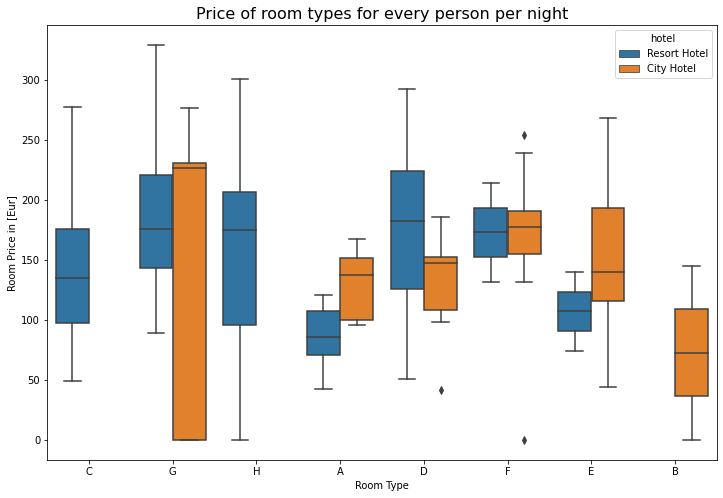

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type', y='adr', data=data_2, hue= 'hotel')
plt.xlabel('Room Type')
plt.ylabel('Room Price in [Eur]')
plt.title('Price of room types for every person per night', fontsize=16)

**4.2 Show average price in each month**

In [26]:
resort_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
272,Resort Hotel,0,87,2015,July,28,10,2,5,2,1.0,1,FB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,0,No Deposit,5.0,0.0,0,Transient,133.83,0,2,Check-Out,7/17/2015
521,Resort Hotel,0,106,2015,July,29,18,2,3,2,1.0,1,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,126.00,0,2,Check-Out,7/23/2015
951,Resort Hotel,0,116,2015,August,32,7,2,5,2,1.0,1,BB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,0,No Deposit,5.0,0.0,0,Transient,133.50,1,2,Check-Out,8/14/2015
998,Resort Hotel,0,81,2015,August,33,9,2,4,2,1.0,1,FB,ESP,Direct,Direct,0,0,0,C,C,0,No Deposit,250.0,0.0,0,Transient,277.00,1,1,Check-Out,8/15/2015
1081,Resort Hotel,0,47,2015,August,33,13,0,3,2,1.0,1,HB,RUS,Online TA,TA/TO,0,0,0,C,C,0,No Deposit,242.0,0.0,0,Transient,255.00,0,2,Check-Out,8/16/2015


In [27]:
#make dataframe from the original one but has only of hotel type = 'city hotel' & has guests (not canceled the reservation)
city_df = final_data[(final_data['hotel'] == 'City Hotel') & (final_data['is_canceled'] ==0)]
city_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40603,City Hotel,0,7,2015,August,32,3,1,2,2,1.0,1,BB,PRT,Complementary,Direct,0,0,0,F,F,0,No Deposit,0.0,0.0,0,Transient,0.0,0,2,Check-Out,8/6/2015
41977,City Hotel,0,17,2015,August,35,29,0,1,2,2.0,1,BB,PRT,Online TA,TA/TO,0,0,0,F,F,1,No Deposit,9.0,0.0,0,Transient-Party,153.0,0,2,Check-Out,8/30/2015
42564,City Hotel,0,24,2015,September,37,7,1,2,2,1.0,1,BB,BRA,Offline TA/TO,TA/TO,0,0,0,A,E,0,No Deposit,22.0,0.0,0,Transient,99.5,0,0,Check-Out,9/10/2015
79650,City Hotel,0,18,2015,October,44,28,0,4,2,1.0,1,BB,PRT,Direct,Direct,0,0,0,F,F,0,No Deposit,0.0,0.0,0,Transient,131.5,0,1,Check-Out,11/1/2015
81482,City Hotel,0,4,2015,December,50,11,0,1,2,2.0,1,BB,PRT,Complementary,Direct,0,0,0,B,B,0,No Deposit,45.0,0.0,0,Transient,0.0,0,0,Check-Out,12/12/2015


In [28]:
avg_price_resort_hotel = resort_df.groupby(['arrival_date_month'])['adr'].mean().reset_index()
avg_price_resort_hotel

,arrival_date_month,adr
0,April,128.263333
1,August,237.995000
2,December,108.134000
3,February,84.041667
4,January,65.006000
5,July,170.624375
6,June,160.613333
7,March,75.000000
8,May,143.393750
9,November,57.900000


In [29]:
avg_price_city_hotel = city_df.groupby(['arrival_date_month'])['adr'].mean().reset_index()
avg_price_city_hotel

,arrival_date_month,adr
0,April,127.750000
1,August,138.720625
2,December,101.586667
3,February,177.272857
4,January,112.800000
5,July,157.378571
6,June,178.200000
7,March,176.842500
8,October,185.250000
9,September,163.360000


In [30]:
#merge like operation(merge 2 dataframes basde on specific col)
final_df = avg_price_resort_hotel.merge(avg_price_city_hotel, on='arrival_date_month')
final_df.columns = ['month', 'avg_resort_hotel_price', 'avg_city_hotel_price']
final_df

,month,avg_resort_hotel_price,avg_city_hotel_price
0,April,128.263333,127.750000
1,August,237.995000,138.720625
2,December,108.134000,101.586667
3,February,84.041667,177.272857
4,January,65.006000,112.800000
5,July,170.624375,157.378571
6,June,160.613333,178.200000
7,March,75.000000,176.842500
8,October,124.250000,185.250000
9,September,172.835000,163.360000


In [31]:
xp.line(final_df, x='month', y='avg_resort_hotel_price', hover_name='month', title='Average Room Price over Year in Resort Hotel')

In [32]:
xp.line(final_df, x='month', y='avg_city_hotel_price', hover_name='month', title='Average Room Price over Year in City Hotel')

**4.3 Show how many nights spent at weekend guests for each market segments and hotel type**

In [33]:
data_2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
272,Resort Hotel,0,87,2015,July,28,10,2,5,2,1.0,1,FB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,0,No Deposit,5.0,0.0,0,Transient,133.83,0,2,Check-Out,7/17/2015
521,Resort Hotel,0,106,2015,July,29,18,2,3,2,1.0,1,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,126.00,0,2,Check-Out,7/23/2015
951,Resort Hotel,0,116,2015,August,32,7,2,5,2,1.0,1,BB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,0,No Deposit,5.0,0.0,0,Transient,133.50,1,2,Check-Out,8/14/2015
998,Resort Hotel,0,81,2015,August,33,9,2,4,2,1.0,1,FB,ESP,Direct,Direct,0,0,0,C,C,0,No Deposit,250.0,0.0,0,Transient,277.00,1,1,Check-Out,8/15/2015
1081,Resort Hotel,0,47,2015,August,33,13,0,3,2,1.0,1,HB,RUS,Online TA,TA/TO,0,0,0,C,C,0,No Deposit,242.0,0.0,0,Transient,255.00,0,2,Check-Out,8/16/2015


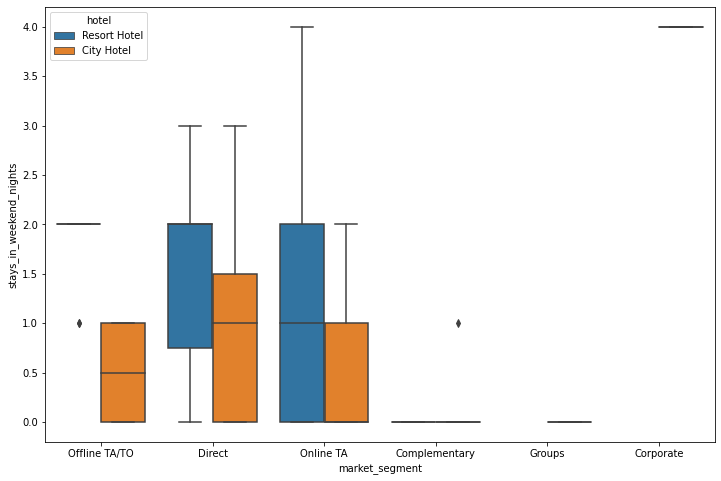

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(x='market_segment', y='stays_in_weekend_nights', hue='hotel', data=data_2)

**4.4 Show the meal perfernces of guests**

In [35]:
values = data_2['meal'].value_counts()
names = data_2['meal'].value_counts().index
names

Index(['BB', 'HB', 'FB', 'Undefined', 'SC'], dtype='object')

In [36]:
xp.pie(data_2, values=values, names=names, hole=.5,  color_discrete_sequence=xp.colors.sequential.RdBu)

**4.5 Show pivoit table has relationship between Total special requests & is_canceled booking status**

In [37]:
final_data.groupby(['total_of_special_requests' ,'is_canceled'])['total_of_special_requests'].count()

total_of_special_requests  is_canceled
0                          0              29
                           1              18
1                          0              33
                           1               7
2                          0              43
                           1               4
3                          0              30
                           1               4
4                          0               4
Name: total_of_special_requests, dtype: int64

In [38]:
pivoit = final_data.groupby(['total_of_special_requests' ,'is_canceled']).agg({'total_of_special_requests':'count'}).rename(columns={'total_of_special_requests':'count'}).unstack()
pivoit

count      
is_canceled                   0     1
total_of_special_requests            
0                          29.0  18.0
1                          33.0   7.0
2                          43.0   4.0
3                          30.0   4.0
4                           4.0   NaN

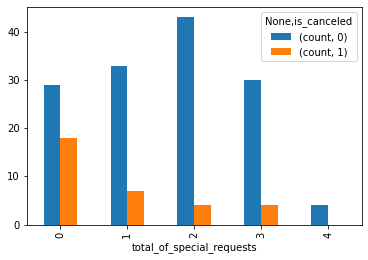

In [39]:
pivoit.plot(kind='bar')

**4.6 Analyze number of guests in each month**

In [40]:
resort_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
272,Resort Hotel,0,87,2015,July,28,10,2,5,2,1.0,1,FB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,0,No Deposit,5.0,0.0,0,Transient,133.83,0,2,Check-Out,7/17/2015
521,Resort Hotel,0,106,2015,July,29,18,2,3,2,1.0,1,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,126.00,0,2,Check-Out,7/23/2015
951,Resort Hotel,0,116,2015,August,32,7,2,5,2,1.0,1,BB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,0,No Deposit,5.0,0.0,0,Transient,133.50,1,2,Check-Out,8/14/2015
998,Resort Hotel,0,81,2015,August,33,9,2,4,2,1.0,1,FB,ESP,Direct,Direct,0,0,0,C,C,0,No Deposit,250.0,0.0,0,Transient,277.00,1,1,Check-Out,8/15/2015
1081,Resort Hotel,0,47,2015,August,33,13,0,3,2,1.0,1,HB,RUS,Online TA,TA/TO,0,0,0,C,C,0,No Deposit,242.0,0.0,0,Transient,255.00,0,2,Check-Out,8/16/2015


In [41]:
resort_rush = resort_df['arrival_date_month'].value_counts().reset_index()
resort_rush.columns = ['month', 'no of guests']
resort_rush

,month,no of guests
0,August,20
1,July,16
2,June,9
3,May,8
4,April,6
5,February,6
6,January,5
7,December,5
8,October,3
9,September,2


In [42]:
city_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40603,City Hotel,0,7,2015,August,32,3,1,2,2,1.0,1,BB,PRT,Complementary,Direct,0,0,0,F,F,0,No Deposit,0.0,0.0,0,Transient,0.0,0,2,Check-Out,8/6/2015
41977,City Hotel,0,17,2015,August,35,29,0,1,2,2.0,1,BB,PRT,Online TA,TA/TO,0,0,0,F,F,1,No Deposit,9.0,0.0,0,Transient-Party,153.0,0,2,Check-Out,8/30/2015
42564,City Hotel,0,24,2015,September,37,7,1,2,2,1.0,1,BB,BRA,Offline TA/TO,TA/TO,0,0,0,A,E,0,No Deposit,22.0,0.0,0,Transient,99.5,0,0,Check-Out,9/10/2015
79650,City Hotel,0,18,2015,October,44,28,0,4,2,1.0,1,BB,PRT,Direct,Direct,0,0,0,F,F,0,No Deposit,0.0,0.0,0,Transient,131.5,0,1,Check-Out,11/1/2015
81482,City Hotel,0,4,2015,December,50,11,0,1,2,2.0,1,BB,PRT,Complementary,Direct,0,0,0,B,B,0,No Deposit,45.0,0.0,0,Transient,0.0,0,0,Check-Out,12/12/2015


In [43]:
city_rush = city_df['arrival_date_month'].value_counts().reset_index()
city_rush.columns = ['month', 'no of guests']
city_rush

,month,no of guests
0,August,16
1,July,7
2,February,7
3,December,6
4,September,5
5,March,4
6,April,4
7,January,4
8,October,2
9,June,1


In [44]:
#merge resort_rush with city_rush on month col
month_rush = resort_rush.merge(city_rush, on='month')
month_rush.columns = ['month', 'no of guests_resort', 'no of guests_city']
month_rush

,month,no of guests_resort,no of guests_city
0,August,20,16
1,July,16,7
2,June,9,1
3,April,6,4
4,February,6,7
5,January,5,4
6,December,5,6
7,October,3,2
8,September,2,5
9,March,1,4


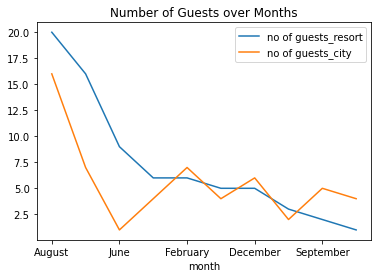

In [49]:
month_rush.plot(x ='month', y=['no of guests_resort', 'no of guests_city'], kind = 'line', title='Number of Guests over Months')

**4.7 Show how long do people stay in hotels**

In [50]:
data_2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
272,Resort Hotel,0,87,2015,July,28,10,2,5,2,1.0,1,FB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,0,No Deposit,5.0,0.0,0,Transient,133.83,0,2,Check-Out,7/17/2015
521,Resort Hotel,0,106,2015,July,29,18,2,3,2,1.0,1,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,126.00,0,2,Check-Out,7/23/2015
951,Resort Hotel,0,116,2015,August,32,7,2,5,2,1.0,1,BB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,0,No Deposit,5.0,0.0,0,Transient,133.50,1,2,Check-Out,8/14/2015
998,Resort Hotel,0,81,2015,August,33,9,2,4,2,1.0,1,FB,ESP,Direct,Direct,0,0,0,C,C,0,No Deposit,250.0,0.0,0,Transient,277.00,1,1,Check-Out,8/15/2015
1081,Resort Hotel,0,47,2015,August,33,13,0,3,2,1.0,1,HB,RUS,Online TA,TA/TO,0,0,0,C,C,0,No Deposit,242.0,0.0,0,Transient,255.00,0,2,Check-Out,8/16/2015


In [52]:
#Total nights which each guest stay in hotel
data_2['total_nights'] = data_2['stays_in_weekend_nights'] + data_2['stays_in_week_nights']
data_2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
272,Resort Hotel,0,87,2015,July,28,10,2,5,2,1.0,1,FB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,0,No Deposit,5.0,0.0,0,Transient,133.83,0,2,Check-Out,7/17/2015,7
521,Resort Hotel,0,106,2015,July,29,18,2,3,2,1.0,1,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,126.00,0,2,Check-Out,7/23/2015,5
951,Resort Hotel,0,116,2015,August,32,7,2,5,2,1.0,1,BB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,0,No Deposit,5.0,0.0,0,Transient,133.50,1,2,Check-Out,8/14/2015,7
998,Resort Hotel,0,81,2015,August,33,9,2,4,2,1.0,1,FB,ESP,Direct,Direct,0,0,0,C,C,0,No Deposit,250.0,0.0,0,Transient,277.00,1,1,Check-Out,8/15/2015,6
1081,Resort Hotel,0,47,2015,August,33,13,0,3,2,1.0,1,HB,RUS,Online TA,TA/TO,0,0,0,C,C,0,No Deposit,242.0,0.0,0,Transient,255.00,0,2,Check-Out,8/16/2015,3


In [57]:
nights_df = data_2.groupby(['total_nights', 'hotel'])['is_canceled'].count().reset_index()
nights_df = nights_df.rename(columns= {'is_canceled':'guests_number'})
nights_df

,total_nights,hotel,guests_number
0,1,City Hotel,17
1,1,Resort Hotel,9
2,2,City Hotel,14
3,2,Resort Hotel,12
4,3,City Hotel,11
5,3,Resort Hotel,9
6,4,City Hotel,7
7,4,Resort Hotel,7
8,5,City Hotel,4
9,5,Resort Hotel,18


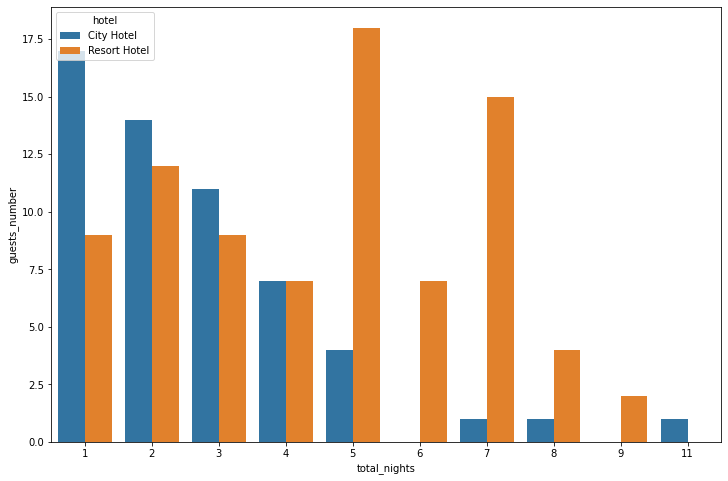

In [72]:
plt.figure(figsize=(12,8))
sns.barplot(x='total_nights', y='guests_number', hue='hotel', data=nights_df)

**4.8 Show Bookings per Market Segment**

In [64]:
values = data_2['market_segment'].value_counts()
labels = data_2['market_segment'].value_counts().index

Index(['Direct', 'Online TA', 'Offline TA/TO', 'Complementary', 'Corporate',
       'Groups'],
      dtype='object')

In [69]:
xp.pie(data_2, values=values, names=labels, title='Bookings per Market Segments')

**4.9 Show price per night(adr) based on market segment & reserved room type**

In [73]:
data_2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_nights'],
      dtype='object')

In [78]:
data_2 = data_2.rename(columns=({'adr':'room_price'}))

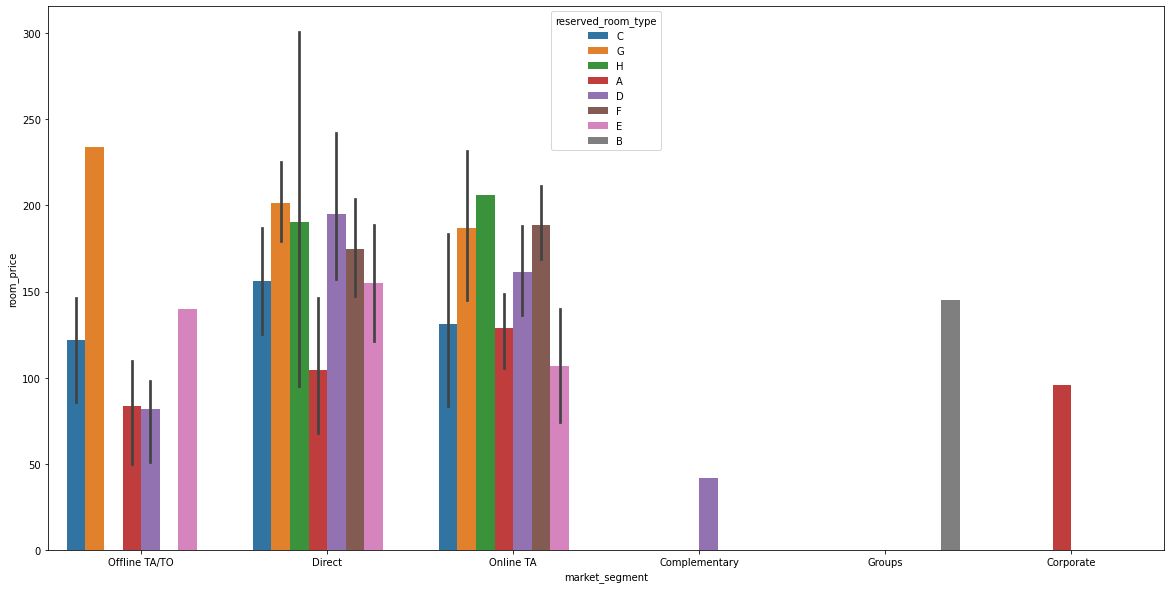

In [80]:
plt.figure(figsize=(20,10))
sns.barplot(x='market_segment', y='room_price', hue='reserved_room_type', data=data_2)

**4.10 How many booking canceled in each hotel type**

In [81]:
#filter data which has only cancelation
filter = final_data['is_canceled']==1
cancel_df = final_data[filter]
cancel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1339,Resort Hotel,1,70,2015,August,35,24,2,5,2,1.0,1,FB,PRT,Offline TA/TO,TA/TO,0,0,0,C,C,1,No Deposit,196.0,0.0,0,Transient,197.70,0,1,Canceled,6/16/2015
1485,Resort Hotel,1,38,2015,September,36,1,0,2,2,1.0,1,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,250.0,0.0,0,Transient,123.00,0,0,Canceled,8/6/2015
3574,Resort Hotel,1,113,2015,December,52,24,2,4,2,2.0,1,BB,PRT,Direct,Direct,0,0,0,G,G,0,No Deposit,0.0,0.0,0,Transient,73.10,0,1,Canceled,12/16/2015
5189,Resort Hotel,1,56,2016,April,17,19,2,7,2,2.0,1,BB,PRT,Online TA,TA/TO,0,0,0,G,G,1,No Deposit,240.0,0.0,0,Transient,118.00,0,0,Canceled,2/24/2016
6681,Resort Hotel,1,11,2016,June,26,24,0,1,1,2.0,1,BB,PRT,Direct,Direct,0,0,0,H,H,0,No Deposit,0.0,0.0,0,Transient,174.00,0,0,Canceled,6/24/2016
6705,Resort Hotel,1,117,2016,June,26,25,3,6,2,1.0,1,FB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,196.50,0,0,Canceled,5/24/2016
6991,Resort Hotel,1,143,2016,July,29,15,2,7,2,2.0,1,BB,PRT,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,240.0,0.0,0,Transient,12.00,0,0,Canceled,2/24/2016
7056,Resort Hotel,1,224,2016,July,30,18,1,4,2,1.0,1,HB,PRT,Online TA,TA/TO,0,0,0,C,C,0,No Deposit,242.0,0.0,0,Transient,187.20,0,2,Canceled,6/14/2016
7251,Resort Hotel,1,142,2016,July,31,30,2,6,2,1.0,1,FB,PRT,Direct,Direct,0,0,0,C,C,1,No Deposit,250.0,0.0,0,Transient,292.00,0,0,Canceled,7/19/2016
7304,Resort Hotel,1,5,2016,August,32,2,0,1,2,1.0,1,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Canceled,7/28/2016


In [84]:
#filter cancel data with only Resort Hotel
resort_cancel = len(cancel_df[cancel_df['hotel']=='Resort Hotel'])
#filter cancel data with only City Hotel
city_cancel = len(cancel_df[cancel_df['hotel']=='City Hotel'])

13

In [85]:
xp.pie(values=[resort_cancel, city_cancel], names=['Resort Hotal Canelation', 'City Hotal Canelation'])